In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

In [3]:
mcdonalds = pd.read_csv("mcdonalds.csv")

print(mcdonalds.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [5]:
print(mcdonalds.shape)

(1453, 15)


In [6]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [9]:
MD_x = mcdonalds.iloc[:, 0:11]

MD_x = (MD_x == "Yes").astype(int)

column_means = np.round(MD_x.mean(), 2)

print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [15]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

print("Importance of components:")
print("\t\t\tPC1\tPC2\tPC3\tPC4\tPC5\tPC6\tPC7\tPC8\tPC9\tPC10\tPC11")
print("Standard deviation", end='\t')
print(*["{:.5f}".format(std_dev**0.5) for std_dev in pca.explained_variance_], sep='\t')
print("Proportion of Variance", end='\t')
print(*["{:.5f}".format(prop) for prop in pca.explained_variance_ratio_], sep='\t')
print("Cumulative Proportion", end='\t')
print(*["{:.5f}".format(cum_prop) for cum_prop in pca.explained_variance_ratio_.cumsum()], sep='\t')


Importance of components:
			PC1	PC2	PC3	PC4	PC5	PC6	PC7	PC8	PC9	PC10	PC11
Standard deviation	0.75705	0.60746	0.50462	0.39880	0.33741	0.31027	0.28970	0.27512	0.26525	0.24884	0.23690
Proportion of Variance	0.29945	0.19280	0.13305	0.08310	0.05948	0.05030	0.04385	0.03955	0.03676	0.03235	0.02932
Cumulative Proportion	0.29945	0.49224	0.62529	0.70839	0.76787	0.81817	0.86201	0.90156	0.93832	0.97068	1.00000


In [18]:
# Print standard deviations
print("Standard deviations (1, .., p=11):")
print(pca.explained_variance_ ** 0.5)

# Print rotation matrix
print("Rotation (n x k) = (11 x 11):")
rotation_matrix = pd.DataFrame(pca.components_, columns=mcdonalds.columns[0:11])
print(rotation_matrix.to_string(index=False))

Standard deviations (1, .., p=11):
[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
Rotation (n x k) = (11 x 11):
    yummy  convenient     spicy  fattening    greasy      fast     cheap     tasty  expensive   healthy  disgusting
-0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186 -0.471514   0.329042 -0.213711    0.374753
 0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633  0.307318   0.601286  0.076593   -0.139656
-0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310 -0.287265   0.024397  0.192051   -0.088571
 0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958 -0.002547   0.067816  0.763488    0.369539
-0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973 -0.210899  -0.003125  0.287846   -0.729209
 0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241 -0.076914  -0.261342 -0.178226   -0.210878

In [ ]:
print("Standard deviations (1, .., p=11):")
print("[{}]".format(" ".join("{:.1f}".format(std) for std in pca.explained_variance_)))

print("\nRotation (n x k) = (11 x 11):")
print("PC1\tPC2\tPC3\tPC4\tPC5\tPC6\tPC7")
for i, (feature, component) in enumerate(zip(MD_x.columns, pca.components_)):
    print("\t".join("{:.3f}".format(weight) for weight in component), end='\n' if (i+1)%5==0 else '\t')

Standard deviations (1, .., p=11):
[2.8 1.6 1.4 1.1 0.9 0.8 0.7 0.6 0.5 0.3 0.3]

Rotation (n x k) = (11 x 11):
PC1	PC2	PC3	PC4	PC5	PC6	PC7
-0.407	-0.309	-0.023	0.178	0.268	-0.213	-0.289	-0.426	0.291	-0.267	0.411	0.283	-0.046	0.070	-0.206	-0.136	-0.282	-0.575	0.242	0.568	0.201	-0.144	-0.260	-0.317	0.020	-0.608	-0.390	-0.211	0.125	-0.270	-0.183	0.368	0.090	0.026	-0.009	0.845	-0.023	0.331	0.090	0.114	0.073	0.036	0.302	0.235	0.347	-0.437	-0.186	0.087	0.344	-0.569	0.257	0.286	-0.207	0.052	0.106
-0.125	0.189	0.439	0.108	-0.278	-0.573	0.021	-0.053	-0.171	-0.446	-0.328	0.160	-0.662	0.214	-0.024	-0.307	0.392	-0.009	0.197	0.015	-0.449	-0.017	0.017	0.150	-0.028	-0.720	0.487	0.056	-0.065	0.059	-0.062	-0.446	-0.079	-0.195	-0.337	0.025	0.105	0.346	0.099	-0.062	-0.214	-0.010	0.219	-0.781	0.691	0.029	0.058	-0.020	-0.015	0.018	0.060	-0.713	0.030	-0.055	-0.016
-0.092	0.021	-0.042	-0.075	-0.031	-0.054	0.692	0.006	0.694	-0.090	-0.109	

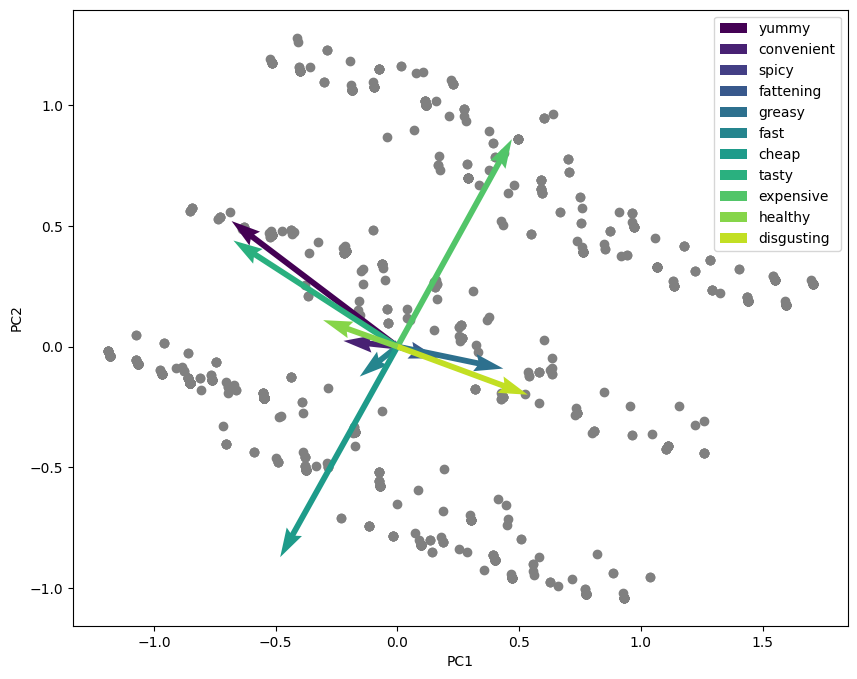

In [23]:
pca_scores = pca.transform(MD_x)
plt.figure(figsize=(10, 8))

plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color="grey")

for i in range(pca.components_.shape[0]):
    plt.quiver(0, 0, pca.components_[0, i], pca.components_[1, i], angles='xy', scale_units='xy', scale=0.7, color=plt.cm.viridis(i / pca.components_.shape[0]), label=mcdonalds.columns[0:11][i])

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend()

plt.show()

In [26]:
np.random.seed(1234)

best_kmeans_model = None
best_inertia = float('inf')
best_n_clusters = 0

for n_clusters in range(2, 9):
    for _ in range(10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=np.random.randint(0, 4294967295))
        kmeans.fit(MD_x)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans_model = kmeans
            best_n_clusters = n_clusters

le = LabelEncoder()
le.fit(best_kmeans_model.labels_)
MD_km28 = best_kmeans_model
MD_km28.labels_ = le.transform(MD_km28.labels_) + 1

In [27]:
print(MD_x.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')


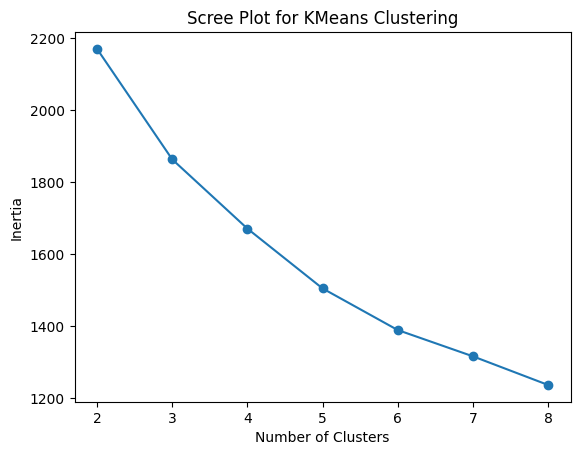

In [28]:
inertia_values = []

for n_clusters in range(2, 9):
    inertia_sum = 0
    for _ in range(10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=np.random.randint(0, 4294967295))
        kmeans.fit(MD_x)
        inertia_sum += kmeans.inertia_

    average_inertia = inertia_sum / 10
    inertia_values.append(average_inertia)

plt.plot(range(2, 9), inertia_values, marker='o')
plt.title('Scree Plot for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

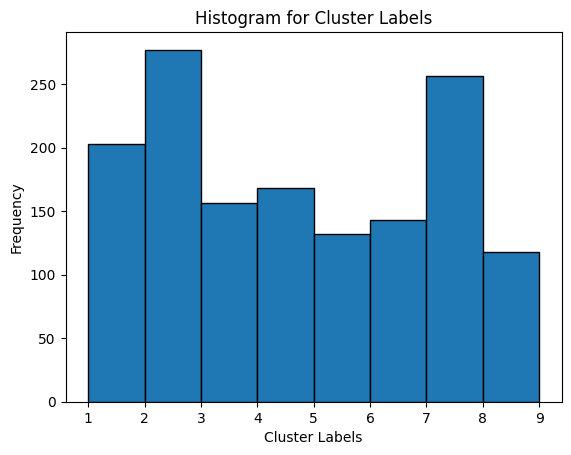

In [29]:
segment_values = MD_km28.labels_

plt.hist(segment_values, bins=range(1, best_n_clusters + 2), edgecolor='black', range=(0, 1))  # Adjust bins based on the number of clusters

plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.title('Histogram for Cluster Labels')

plt.show()


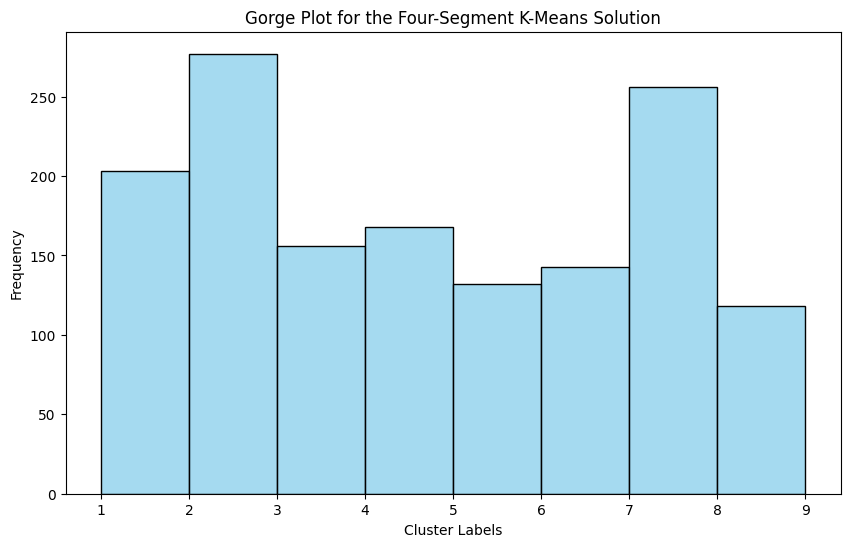

In [31]:
segment_values = MD_km28.labels_

plt.figure(figsize=(10, 6))
sns.histplot(segment_values, bins=range(1, best_n_clusters + 2), color='skyblue', edgecolor='black')

plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.title('Gorge Plot for the Four-Segment K-Means Solution')

plt.show()

In [32]:
MD_k4 = MD_km28.labels_.copy()

In [34]:
cluster_labels = MD_km28.labels_

silhouette_avg = silhouette_score(MD_x, cluster_labels)
print(f"Silhouette Score for the four-segment solution: {silhouette_avg}")

Silhouette Score for the four-segment solution: 0.29190843013257667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

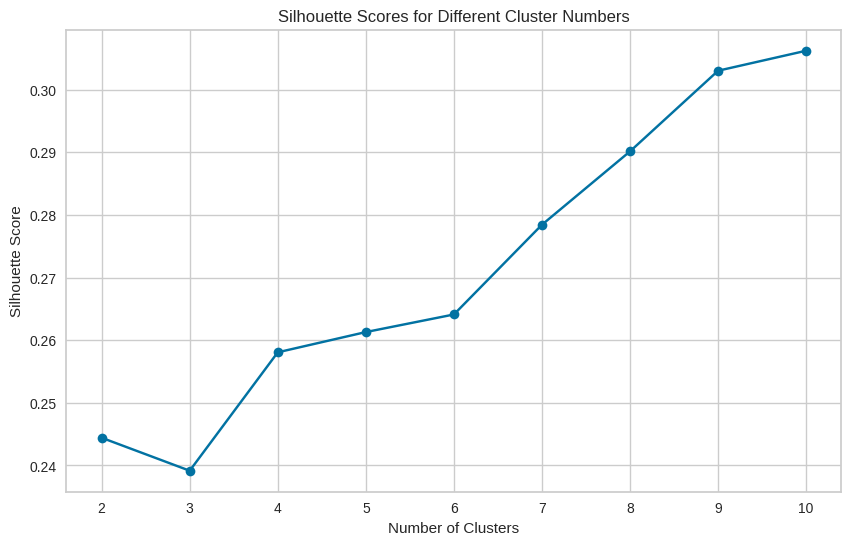

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def fit_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans

silhouette_scores = []

cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans_model = fit_kmeans(MD_x, n_clusters)
    silhouette_scores.append(silhouette_score(MD_x, kmeans_model.labels_))

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [38]:
np.random.seed(1234)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

MD_x = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

np.random.seed(1234)

k_range = range(2, 9)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(MD_x)

    print(f"Number of components (clusters): {k}")
    print("Means:")
    print(gmm.means_)
    print("Covariances:")
    print(gmm.covariances_)
    print("\n")


Number of components (clusters): 2
Means:
[[-1.05707361 -2.39433041]
 [-5.75059998  8.08498738]]
Covariances:
[[[34.39320515 25.56223149]
  [25.56223149 20.58443069]]

 [[10.35600618  2.83244218]
  [ 2.83244218  1.76884438]]]


Number of components (clusters): 3
Means:
[[ 4.71820488  2.04179661]
 [-5.75059982  8.08498735]
 [-6.83235205 -6.83045748]]
Covariances:
[[[ 1.06767435 -0.05404987]
  [-0.05404987  1.014185  ]]

 [[10.35600773  2.83244179]
  [ 2.83244179  1.76884443]]

 [[ 1.01105314 -0.06122587]
  [-0.06122587  0.79622869]]]


Number of components (clusters): 4
Means:
[[ 4.7182049   2.04179676]
 [-8.8566659   7.18149117]
 [-6.83235205 -6.83045748]
 [-2.69354729  8.97422662]]
Covariances:
[[[ 1.06767431 -0.0540498 ]
  [-0.0540498   1.01418552]]

 [[ 0.88076244  0.11610337]
  [ 0.11610337  0.98177783]]

 [[ 1.01105314 -0.06122587]
  [-0.06122587  0.79622869]]

 [[ 0.84075261  0.02543115]
  [ 0.02543115  0.94932046]]]


Number of components (clusters): 5
Means:
[[ 4.7182049   2.04

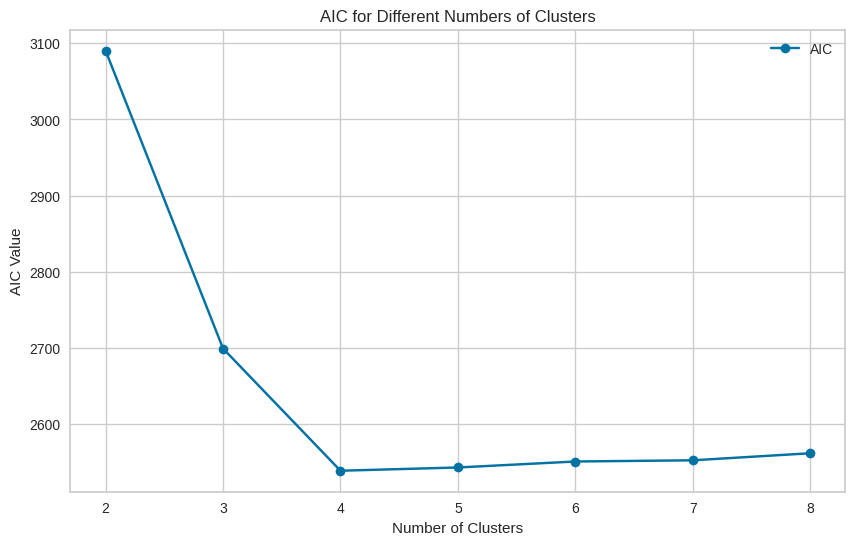

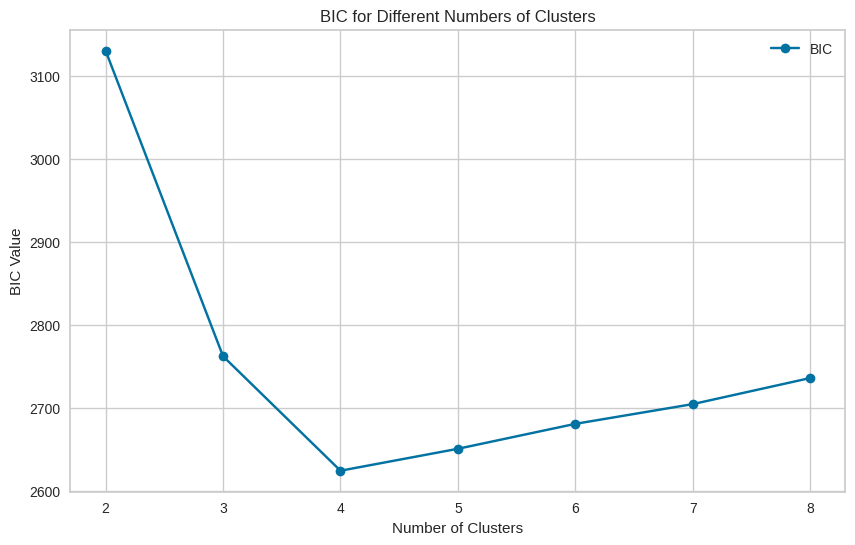

In [39]:
np.random.seed(1234)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

MD_x = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

np.random.seed(1234)

k_range = range(2, 9)
aic_values = []
bic_values = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(MD_x)

    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

plt.figure(figsize=(10, 6))
plt.plot(k_range, aic_values, marker='o', label='AIC')
plt.title('AIC for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_range, bic_values, marker='o', label='BIC')
plt.title('BIC for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Value')
plt.legend()
plt.show()


In [40]:
like_counts = mcdonalds['Like'].value_counts()

reversed_counts = like_counts.sort_index(ascending=False)

print(reversed_counts)

I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [41]:
mcdonalds['Like_n'] = mcdonalds['Like'].str.extract('(\d+)').astype(float)
mcdonalds['Like_n'] = 6 - mcdonalds['Like_n']

like_n_counts = mcdonalds['Like_n'].value_counts()
print(like_n_counts)


3.0    302
1.0    295
4.0    246
2.0    231
5.0    210
6.0    169
Name: Like_n, dtype: int64


In [42]:
pip install patsy

In [43]:
import patsy

formula_string = "1 + " + " + ".join(mcdonalds.columns[1:11])
design_matrix = patsy.dmatrix(formula_string, data=mcdonalds, return_type='dataframe')

# Display the design matrix
print(design_matrix)

      Intercept  convenient[T.Yes]  spicy[T.Yes]  fattening[T.Yes]  \
0           1.0                1.0           0.0               1.0   
1           1.0                1.0           0.0               1.0   
2           1.0                1.0           1.0               1.0   
3           1.0                1.0           0.0               1.0   
4           1.0                1.0           0.0               1.0   
...         ...                ...           ...               ...   
1448        1.0                1.0           0.0               1.0   
1449        1.0                1.0           0.0               1.0   
1450        1.0                1.0           0.0               1.0   
1451        1.0                1.0           0.0               0.0   
1452        1.0                1.0           0.0               1.0   

      greasy[T.Yes]  fast[T.Yes]  cheap[T.Yes]  tasty[T.Yes]  \
0               0.0          1.0           1.0           0.0   
1               1.0          1.

In [44]:
pip install mixmod

In [45]:
pip install pymix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 1.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [46]:
np.random.seed(1234)
gmm = GaussianMixture(n_components=2, n_init=10)
gmm.fit(design_matrix)

print(gmm)

GaussianMixture(n_components=2, n_init=10)
